## Multiple Linear Regression

Now you know how to build a model with one X (independent variable) and Y (dependent variable). But what if you have three feature variables, or may be 10 or 100? By using multiple linear regression, you can build models between a dependent variable and many independent variables.

Dataset - advertising.csv

Independent variables - TV Ad Expenses, Radio Ad Expenses, Newspaper Ad Expenses

Dependent variable - Sales

In [1]:
#1 Import necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2 Import the dataset (advertising.csv) and look at the top five rows
dataset  = pd.read_csv('advertising.csv')
dataset.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#3 Look at the bottom five rows
dataset.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
#4 Check the shape of the DataFrame (rows, columns)
dataset.shape

(200, 4)

In [5]:
#5 Look at the data types of the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
#6 Look at the summary statistics
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


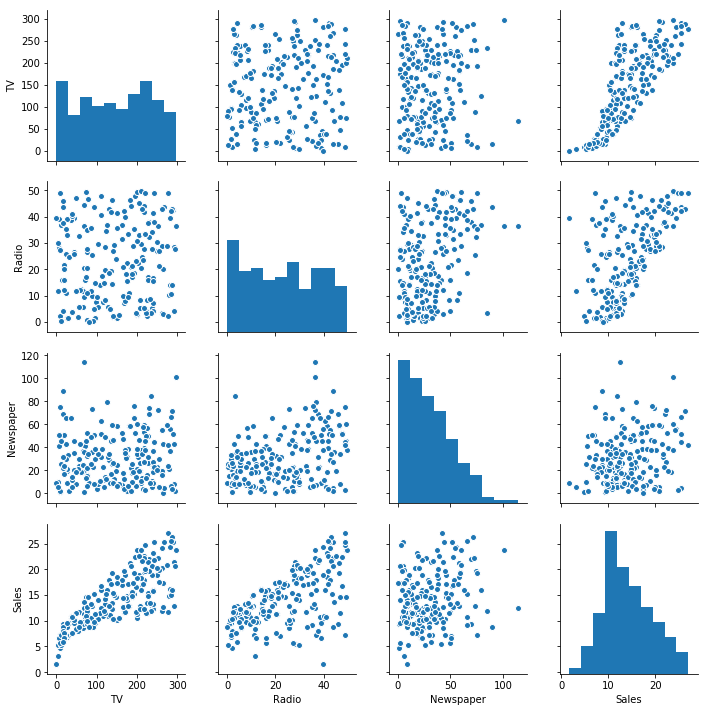

In [7]:
#7 Do a pairplot of the variables
sns.pairplot(dataset)

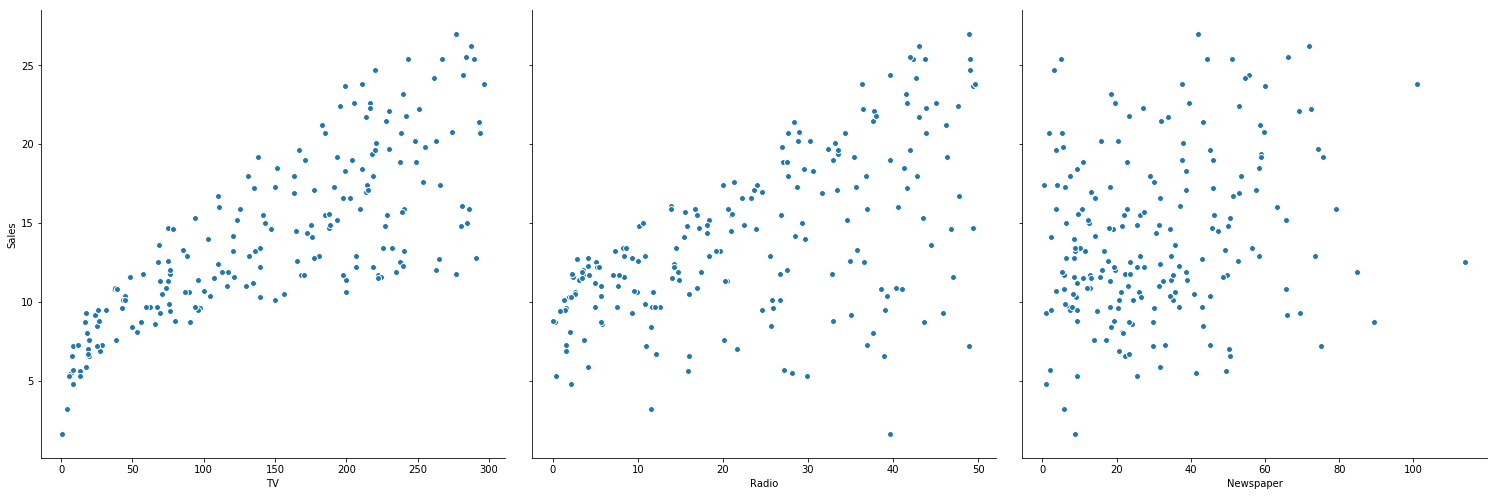

In [36]:
#8 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
sns.pairplot(dataset , x_vars = ['TV','Radio','Newspaper'] , y_vars = 'Sales' , size = 7)

In [9]:
#9 Prepare  X (independent variables) and y (dependent variable)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

In [10]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0)

In [11]:
#11 Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Residual plot - plot y_pred in x axis and errors in y axis
y_predt = regressor.predict(X_train)
error = y_predt - y_train

Text(0,0.5,' Errors ')

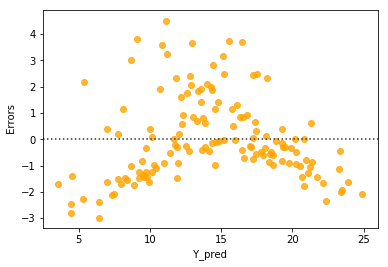

In [13]:
sns.residplot(y_predt,error ,color = 'orange')
plt.xlabel(" Y_pred ")
plt.ylabel(" Errors ")

In [14]:
#13 Predic on the test set 
y_pred  = regressor.predict(X_test)
y_pred

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [15]:
#14 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3.6913948456986074
r_square_value : 0.8649018906637792


## Backward elimination

In [16]:
#15 Build the optimal model using backward elimination
import statsmodels.formula.api as sm
X= np.append(arr = np.ones((200,1)).astype(int),values = X,axis = 1)
x_opt = X[:,[0,1,2,3]]
regressor_ols = sm.OLS(endog = y ,exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        11:33:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_opt = X[:,[0,1,2]]
regressor_ols = sm.OLS(endog = y ,exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           4.83e-98
Time:                        11:33:27   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
x1             0.0458      0.001     32.909      0.000       0.043       0.048
x2             0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [18]:
#16Import the dataset (Housing.csv) and look at the top five rows
house = pd.read_csv('Housing.csv')
house.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
#17 Look at the bottom five rows
house.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [20]:
#18 Check the shape of the DataFrame (rows, columns)
house.shape

(545, 13)

In [21]:
#19 Look at the data types of the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [22]:
#20 Look at the summary statistics
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [23]:
#21 Prepare  X (independent variables) and y (dependent variable)
X =  house.iloc[:,1:].values
y  = house.iloc[:,0].values
X.shape

(545, 12)

In [24]:
#22 Encoding categorical data in X
# Encoding the dataset
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEncoder_X = LabelEncoder()
X[:,4] = labelEncoder_X.fit_transform(X[:,4])
X[:,5] = labelEncoder_X.fit_transform(X[:,5])
X[:,6] = labelEncoder_X.fit_transform(X[:,6])
X[:,7] = labelEncoder_X.fit_transform(X[:,7])
X[:,8] = labelEncoder_X.fit_transform(X[:,8])
X[:,10] = labelEncoder_X.fit_transform(X[:,10])
X[:,11] = labelEncoder_X.fit_transform(X[:,11])
onehotencoder = OneHotEncoder(categorical_features = [11])
X= onehotencoder.fit_transform(X).toarray()

In [25]:
#23 Avoiding the Dummy Variable Trap
X = X[:,1:]
X[1,:]

array([0.00e+00, 0.00e+00, 8.96e+03, 4.00e+00, 4.00e+00, 4.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 3.00e+00,
       0.00e+00])

In [26]:
#24 Look at the top 5 rows after preprocessing
X[:5,:]

array([[0.00e+00, 0.00e+00, 7.42e+03, 4.00e+00, 2.00e+00, 3.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 2.00e+00,
        1.00e+00],
       [0.00e+00, 0.00e+00, 8.96e+03, 4.00e+00, 4.00e+00, 4.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 3.00e+00,
        0.00e+00],
       [1.00e+00, 0.00e+00, 9.96e+03, 3.00e+00, 2.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        1.00e+00],
       [0.00e+00, 0.00e+00, 7.50e+03, 4.00e+00, 2.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 3.00e+00,
        1.00e+00],
       [0.00e+00, 0.00e+00, 7.42e+03, 4.00e+00, 1.00e+00, 2.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 2.00e+00,
        0.00e+00]])

In [27]:
#25 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
#26 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0)


## Backward elimination

In [29]:
#27 #15 Build the optimal model using backward elimination
import statsmodels.formula.api as sm
X= np.append(arr = np.ones((545,1)).astype(int),values = X,axis = 1)
x_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
regressor_ols = sm.OLS(endog = y ,exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     87.14
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          3.99e-117
Time:                        11:33:30   Log-Likelihood:                -8347.3
No. Observations:                 545   AIC:                         1.672e+04
Df Residuals:                     532   BIC:                         1.678e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.407e+04   2.71e+05     -0.236      0.813   -5.97e+05    4.69e+05
x1          -6.86e+04    1.2e+05     -0.573      0.567   -3.04e+05    1.67e+05
x2         -4.317e+05    1.3e+05     -3.327      0.001   -6.87e+05   -1.77e+05
x3           266.2251     24.653     10.799      0.000     217.797     314.653
x4          1.234e+05   7.46e+04      1.653      0.099   -2.33e+04     2.7e+05
x5          9.739e+05   1.06e+05      9.164      0.000    7.65e+05    1.18e+06
x6          4.622e+05    6.6e+04      7.007      0.000    3.33e+05    5.92e+05
x7          5.234e+05   1.45e+05      3.608      0.000    2.38e+05    8.08e+05
x8          3.306e+05   1.35e+05      2.442      0.015    6.47e+04    5.96e+05
x9          4.674e+05   1.11e+05      4.196      0.000    2.49e+05    6.86e+05
x10         7.876e+05   2.29e+05      3.437      0.001    3.37e+05    1.24e+06
x11         8.831e+05   1.11e+05      7.928      0.000    6.64e+05     1.1e+06
x12         2.727e+05   6.02e+04      4.531      0.000    1.54e+05    3.91e+05
==============================================================================
Omnibus:                       91.096   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.018
Skew:                           0.820   Prob(JB):                     3.11e-55
Kurtosis:                       5.892   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
x_opt = X[:,[0,2,3,4,5,6,7,8,9,10,11,12]]
regressor_ols = sm.OLS(endog = y ,exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     95.15
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          4.70e-118
Time:                        11:33:30   Log-Likelihood:                -8347.5
No. Observations:                 545   AIC:                         1.672e+04
Df Residuals:                     533   BIC:                         1.677e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.178e+05   2.54e+05     -0.464      0.643   -6.17e+05    3.81e+05
x1         -3.873e+05   1.04e+05     -3.725      0.000   -5.92e+05   -1.83e+05
x2           266.7716     24.619     10.836      0.000     218.410     315.133
x3          1.229e+05   7.46e+04      1.647      0.100   -2.37e+04    2.69e+05
x4          9.751e+05   1.06e+05      9.183      0.000    7.67e+05    1.18e+06
x5           4.63e+05   6.59e+04      7.025      0.000    3.34e+05    5.92e+05
x6          5.274e+05   1.45e+05      3.641      0.000    2.43e+05    8.12e+05
x7          3.332e+05   1.35e+05      2.465      0.014    6.77e+04    5.99e+05
x8          4.678e+05   1.11e+05      4.202      0.000    2.49e+05    6.86e+05
x9          7.846e+05   2.29e+05      3.427      0.001    3.35e+05    1.23e+06
x10          8.89e+05   1.11e+05      8.020      0.000    6.71e+05    1.11e+06
x11         2.737e+05   6.01e+04      4.551      0.000    1.56e+05    3.92e+05
==============================================================================
Omnibus:                       91.552   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.849
Skew:                           0.822   Prob(JB):                     7.54e-56
Kurtosis:                       5.911   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
x_opt = X[:,[0,2,4,5,6,7,8,9,10,11,12]]
regressor_ols = sm.OLS(endog = y ,exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     76.29
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           3.40e-96
Time:                        11:33:30   Log-Likelihood:                -8401.7
No. Observations:                 545   AIC:                         1.683e+04
Df Residuals:                     534   BIC:                         1.687e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.389e+05   2.72e+05      1.978      0.048    3669.125    1.07e+06
x1         -4.356e+05   1.15e+05     -3.800      0.000   -6.61e+05    -2.1e+05
x2          1.901e+05    8.2e+04      2.317      0.021    2.89e+04    3.51e+05
x3          1.086e+06   1.17e+05      9.314      0.000    8.57e+05    1.32e+06
x4          4.127e+05   7.26e+04      5.688      0.000     2.7e+05    5.55e+05
x5          8.879e+05   1.56e+05      5.707      0.000    5.82e+05    1.19e+06
x6          4.716e+05   1.49e+05      3.175      0.002     1.8e+05    7.63e+05
x7          4.055e+05   1.23e+05      3.305      0.001    1.64e+05    6.46e+05
x8          7.379e+05   2.53e+05      2.921      0.004    2.42e+05    1.23e+06
x9          1.055e+06   1.21e+05      8.703      0.000    8.17e+05    1.29e+06
x10         4.454e+05    6.4e+04      6.959      0.000     3.2e+05    5.71e+05
==============================================================================
Omnibus:                       92.810   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.804
Skew:                           0.842   Prob(JB):                     3.46e-55
Kurtosis:                       5.865   Cond. No.                         23.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x_opt = X[:,[2,4,5,6,7,8,9,10,11,12]]
regressor_ols = sm.OLS(endog = y ,exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     914.8
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:33:30   Log-Likelihood:                -8403.7
No. Observations:                 545   AIC:                         1.683e+04
Df Residuals:                     535   BIC:                         1.687e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.651e+05   1.09e+05     -3.342      0.001    -5.8e+05    -1.5e+05
x2          2.907e+05   6.46e+04      4.503      0.000    1.64e+05    4.17e+05
x3          1.137e+06   1.14e+05      9.955      0.000    9.12e+05    1.36e+06
x4          4.148e+05   7.27e+04      5.702      0.000    2.72e+05    5.58e+05
x5          1.042e+06   1.35e+05      7.714      0.000    7.77e+05    1.31e+06
x6          4.611e+05   1.49e+05      3.098      0.002    1.69e+05    7.54e+05
x7           4.23e+05   1.23e+05      3.448      0.001    1.82e+05    6.64e+05
x8          7.438e+05   2.53e+05      2.936      0.003    2.46e+05    1.24e+06
x9          1.043e+06   1.21e+05      8.594      0.000    8.04e+05    1.28e+06
x10         4.407e+05   6.41e+04      6.871      0.000    3.15e+05    5.67e+05
==============================================================================
Omnibus:                       77.794   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.535
Skew:                           0.726   Prob(JB):                     4.69e-44
Kurtosis:                       5.584   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""